# 06. Interpolation - Multiple Linear Regression (+ residual correction)

In this tutorial, we'll cover the interpolation of point data using the Multiple Linear Regression (MLR) methodology and applying a residual correction, available in PyMica as `mlr+id2d` and `mlr+id3d` depending on the residual correction interpolation method. This methodology requires location (`lon` and `lat`), predictor variables such as altitude (`altitude`) or distance to coast line (among others), and value to interpolate. If `mlr+id3d` is selected, `altitude` must be provided in the `variables_files`.

We'll use Meteorological Service of Catalonia sample data to demonstrate how to apply these interpolation techniques. Therefore, we need to import the required modules. First, we need to load observation data and also the PyMica class.

In [2]:
import json

from pymica.pymica import PyMica

### Interpolation mlr+id2d

Let's call the PyMica class with the appropriate parameters, setting the methodology to `mlr+id2d` and the configuration dictionary as follows:

In [3]:
config_file = 'sample-data/configuration_sample.json'

with open('sample-data/configuration_sample.json', 'r') as f_p:
    config = json.load(f_p)

config['mlr+id2d']

{'id_power': 2.5,
 'id_smoothing': 0.0,
 'clusters': 'None',
 'variables_files': {'altitude': 'sample-data/explanatory/cat_dem_25831.tif',
  'dist': 'sample-data/explanatory/cat_distance_coast.tif'},
 'interpolation_bounds': [260000, 4488100, 530000, 4750000],
 'resolution': 270,
 'EPSG': 25831}

where:

- `id_power`: rate at which the influence of distant data points diminishes as we move away from them.
- `id_smoothing`: if 0.0 the interpolated value at that point location becomes identical to the observation value recorded at that precise data point.
- `clusters`: set to None as no clusters will be used.
- `variables_files`: dictionary with predictor variables as keys and their corresponding GeoTIFF path as values. Here, altitude as `altitude` and distance to coast line as `dist`.
- `interpolation_bounds`: [minimum_x_coordinate, minimum_y_coordinate, maximum_x_coordinate, maximum_y_coordinate], it must be the same as the variable files.
- `resolution`: spatial resolution.
- `EPSG`: EPSG projection code.

With all these parameters and configurations set, let's initialize the `PyMica` class with the methodology set to 'mlr+id2d'.

In [4]:
mlr_id2d_method = PyMica(methodology='mlr+id2d', config=config_file)

/home/ecm/anaconda3/envs/pymica-test/lib/python3.10/site-packages/osgeo/osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Now that we have the interpolator set, we can input some data for interpolation. We will use data from the Meteorological Service of Catalonia AWS network.


In [5]:
with open('sample-data/data/smc_data.json', 'r') as f_p:
    data = json.load(f_p)

data[0]

{'id': 'C6',
 'value': 8.8,
 'lon': 0.9517200000000001,
 'lat': 41.6566,
 'altitude': 264.0,
 'dist': 0.8587308027349195}

As we can see, the first element of the data meets the requirements of PyMica input data and has the same predictor variables as the ones provided in the configuration dictionary. Therefore, we only need to call the `interpolate` method from the `mlr_id2d_method` interpolator class.

In [6]:
data_field = mlr_id2d_method.interpolate(data)

Now, we can get a quick look of the `data_field` array using `matplotlib`.

[[ 7.72122955  7.32243394  6.89919173 ... 16.68788727 16.66374626
  16.63980069]
 [ 7.84133297  7.57101443  7.29487755 ... 16.68763741 16.66349234
  16.63954296]
 [ 7.63761234  7.5904346   7.46295186 ... 16.68736746 16.66321852
  16.63926502]
 ...
 [14.05054847 13.97427951 14.00984568 ... 13.36446324 13.3645286
  13.36459443]
 [14.12751698 14.1433594  14.12370095 ... 13.36304811 13.36311632
  13.36318405]
 [14.16442583 14.18598584 14.20300321 ... 13.36163916 13.36170927
  13.36177938]]


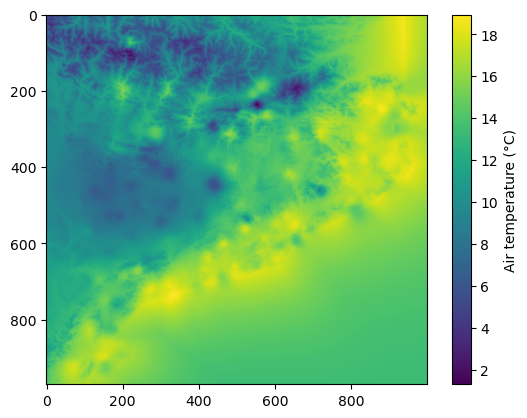

In [7]:
import matplotlib.pyplot as plt

plt.imshow(data_field)
plt.colorbar(label='Air temperature (\u00b0C)')

print(data_field)

We have now completed the first part of this tutorial on how to interpolate station data using the `mlr+id2d` methodology. The obtained result is similar to the one in [05 Interpolation - Multiple linear regression](05_howto_int_mlr.ipynb), but with the additional application of residual correction, which is evident in the interpolated field. You can experiment with changing the `variables_files`, `id_power`, and `id_smoothing` parameters in the configuration dictionary to observe how each parameter affects the interpolation result.


### mlr+id3d

Let's call the PyMica class with the appropriate parameters, setting the methodology to `mlr+id2d` and the configuration dictionary as follows:

In [11]:
config_file = 'sample-data/configuration_sample.json'

with open('sample-data/configuration_sample.json', 'r') as f_p:
    config = json.load(f_p)

config['mlr+id3d']

{'id_power': 2.5,
 'id_smoothing': 0.0,
 'id_penalization': 30,
 'clusters': 'None',
 'variables_files': {'altitude': 'sample-data/explanatory/cat_dem_25831.tif',
  'dist': 'sample-data/explanatory/cat_distance_coast.tif'},
 'interpolation_bounds': [260000, 4488100, 530000, 4750000],
 'resolution': 270,
 'EPSG': 25831}

where:

- `id_power`: rate at which the influence of distant data points diminishes as we move away from them.
- `id_smoothing`: if 0.0 the interpolated value at that point location becomes identical to the observation value recorded at that precise data point.
- `clusters`: set to None as no clusters will be used.
- `variables_files`: dictionary with predictor variables as keys and their corresponding GeoTIFF path as values. Here, altitude as `altitude` and distance to coast line as `dist`. `altitude` is mandatory as selected residual correction is `id3d`.
- `interpolation_bounds`: [minimum_x_coordinate, minimum_y_coordinate, maximum_x_coordinate, maximum_y_coordinate], it must be the same as the variable files.
- `resolution`: spatial resolution.
- `EPSG`: EPSG projection code.

With all these parameters and configurations set, let's initialize the `PyMica` class with the methodology set to 'mlr+id3d'.

In [12]:
mlr_id3d_method = PyMica(methodology='mlr+id3d', config=config_file)

The data we'll use for interpolation is the same as the one used in the `mlr+id2d` section. Then, let's call the `interpolate` class method.

In [14]:
data_field = mlr_id3d_method.interpolate(data)

Now, we can get a quick look of the `data_field` array using `matplotlib`.

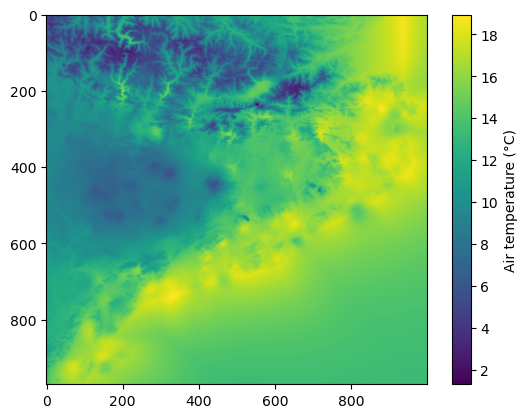

In [15]:
import matplotlib.pyplot as plt

plt.imshow(data_field)
plt.colorbar(label='Air temperature (\u00b0C)')

We have now completed this tutorial on how to interpolate station data using the `mlr` methodology combined with residuals correction (`id2d` and `id3d`). You can experiment with changing the `variables_files` in the configuration dictionary to observe how the behavior of each variable affects the interpolation result.